# Acesso à Internet e à Televisão - Jorge 2A

### Diferenças no acesso a internet no campo e na cidade entre 2013 e 2015 (no Sudeste)

## Introdução:

#### Ao analisar as PNAD's domiciliares de 2013 a 2015 pretendo obter o crescimento da porcentagem de pessoas com acesso a internet (por rede domiciliar ou por 3g e 4g) no campo ao decorrer dos anos e relacionar a diferença da quantidade de acessos com a renda de cada região.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#UF - Unidade Federal
#V4105 - Situação sensitária (1-cidade/4-campo)
#V02322 - Tem acesso a internet no próprio domicílio
#V02424 - Acesso através de 3g ou 4g (2-sim/4-nao)
#V4621 - Renda média domiciliar per capita

In [25]:
dados13 = pd.read_csv('DOM2013.csv')

#transformar as variaveis em "categorias" torna mais facil o seu manuseio quando a mesma é composta por poucos valores repetidos
dados13.V4105 = dados13.V4105.astype('category')
dados13.V02322 = dados13.V02322.astype('category')
dados13.V02424 = dados13.V02424.astype('category')

#localizar as linhas da tabela correspondentes às unidades federais do sudeste
dados13 = dados13.loc[(dados13.UF == 31)|\
                      (dados13.UF == 32)|\
                      (dados13.UF == 33)|\
                      (dados13.UF == 35)]


#selecionar as variaveis que serão utilizadas na análise e adicioná-las a um novo dataframe resumido
dados_resumidos13 = dados13.loc[:,["UF","V4105","V02322","V02424","V4621"]]

#essas variáveis contém alguns valores inválidos que prejudicam a análise, esse comando remove esses valores
dados_resumidos13 = dados_resumidos13[pd.notnull(dados_resumidos13.V02322)&\
                                      pd.notnull(dados_resumidos13.V4621)]
#                                     pd.notnull(dados_resumidos13.V02424)] 
#como o comando (notnull) do pandas remove a linha inteira que contém a variavel inválida, ele pode remover linhas demais e
#prejudicar a análise, por isso optei por manter os valores inválidos da variavel V02424, o que não prejudica os graficos


#alguns dos valores da V4621(renda média domiciliar) não foram declarados, na tabela isso é representado como 999999999999
dados_resumidos13 = dados_resumidos13[dados_resumidos13["V4621"]!=999999999999.0]

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso no prório domicilio mais facilmente
dados_resumidos13.loc[((dados_resumidos13.V4105==1)|\
                      (dados_resumidos13.V4105==2)|\
                      (dados_resumidos13.V4105==3))&\
                      (dados_resumidos13.V02322==2),"Movel_Total"]="Urb"

dados_resumidos13.loc[((dados_resumidos13.V4105==4)|\
                      (dados_resumidos13.V4105==5)|\
                      (dados_resumidos13.V4105==6)|\
                      (dados_resumidos13.V4105==7)|\
                      (dados_resumidos13.V4105==8))&\
                      (dados_resumidos13.V02322==2),"Movel_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Movel13 = dados_resumidos13.Movel_Total.value_counts()

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso por 3g e 4g mais facilmente
dados_resumidos13.loc[((dados_resumidos13.V4105==1)|\
                      (dados_resumidos13.V4105==2)|\
                      (dados_resumidos13.V4105==3))&\
                      (dados_resumidos13.V02424==2),"Fixa_Total"]="Urb"

dados_resumidos13.loc[((dados_resumidos13.V4105==4)|\
                      (dados_resumidos13.V4105==5)|\
                      (dados_resumidos13.V4105==6)|\
                      (dados_resumidos13.V4105==7)|\
                      (dados_resumidos13.V4105==8))&\
                      (dados_resumidos13.V02424==2),"Fixa_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Fixa13 = dados_resumidos13.Fixa_Total.value_counts()


#como essas variaveis foram transformadas em categorias anteriormente, pode-se mudar seus valores(2 e 4) para sim e não
dados_resumidos13.V02424.cat.categories = ("Sim", "Não")
dados_resumidos13.V02322.cat.categories = ("Sim", "Não")

#os próximos comandos localizam as variáveis filtradas e as adicionam a um novo dataframe para ser plotado em um gráfico de %
internet_fixa113 = dados_resumidos13.loc[(dados_resumidos13.V4105==1)|\
                                       (dados_resumidos13.V4105==2)|\
                                       (dados_resumidos13.V4105==3)].V02322.value_counts()

internet_fixa213 = dados_resumidos13.loc[(dados_resumidos13.V4105==4)|\
                                       (dados_resumidos13.V4105==5)|\
                                       (dados_resumidos13.V4105==6)|\
                                       (dados_resumidos13.V4105==7)|\
                                       (dados_resumidos13.V4105==8)].V02322.value_counts()

internet_movel113 = dados_resumidos13.loc[(dados_resumidos13.V4105==1)|\
                                        (dados_resumidos13.V4105==2)|\
                                        (dados_resumidos13.V4105==3)].V02424.value_counts()

internet_movel213 = dados_resumidos13.loc[(dados_resumidos13.V4105==4)|\
                                        (dados_resumidos13.V4105==5)|\
                                        (dados_resumidos13.V4105==6)|\
                                        (dados_resumidos13.V4105==7)|\
                                        (dados_resumidos13.V4105==8)].V02424.value_counts()

#aqui a renda é separada em campo e cidade
renda_Urb13 = dados_resumidos13.loc[(dados_resumidos13.V4105==1)|\
                                  (dados_resumidos13.V4105==2)|\
                                  (dados_resumidos13.V4105==3)]

renda_Rur13 = dados_resumidos13.loc[(dados_resumidos13.V4105==4)|\
                                  (dados_resumidos13.V4105==5)|\
                                  (dados_resumidos13.V4105==6)|\
                                  (dados_resumidos13.V4621==7)|\
                                  (dados_resumidos13.V4621==8)]

#aqui as colunas são renomeadas para uma interpretação mais facil dos dados resumidos
dados_resumidos13 = dados_resumidos13.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02424":"Acesso através de 3g ou 4g",\
                                                      "V4621":"Renda domiciliar mensal per capita"})

dados_final13 = dados_resumidos13

dados_final13.to_csv("resumo2013.csv")

## Gráficos das porcentagens dos tipos de acesso (no campo e na cidade) em 2013

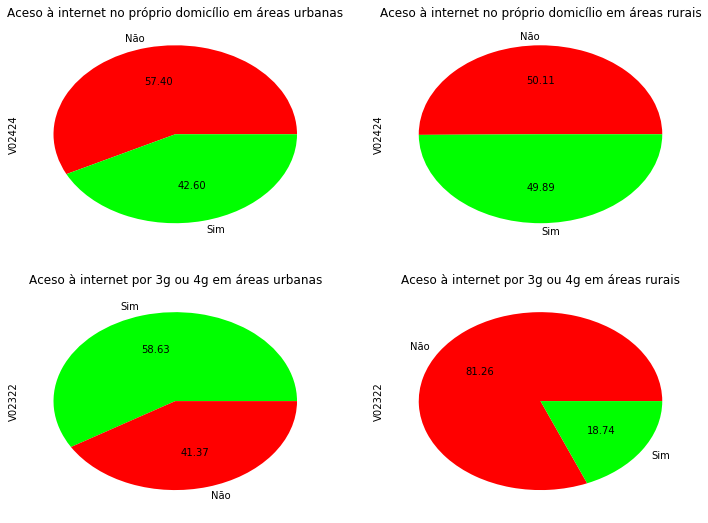

In [34]:
fig,axes = plt.subplots(2,2)

#plotagem dos gráficos de % dos diferentes acessos a internet no campo e na cidade
internet_movel113.plot(kind='pie',ax=axes[0,0],figsize=(12,9), colors=('red','lime'), autopct="%0.2f");axes[0,0].set_title("Aceso à internet no próprio domicílio em áreas urbanas")
internet_movel213.plot(kind='pie',ax=axes[0,1],figsize=(12,9), colors=('red','lime'), autopct="%0.2f");axes[0,1].set_title("Aceso à internet no próprio domicílio em áreas rurais")
internet_fixa113.plot(kind='pie',ax=axes[1,0],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[1,0].set_title("Aceso à internet por 3g ou 4g em áreas urbanas")
internet_fixa213.plot(kind='pie',ax=axes[1,1],figsize=(12,9), colors=('red','lime'), autopct="%0.2f");axes[1,1].set_title("Aceso à internet por 3g ou 4g em áreas rurais")

## Gráficos relacionando renda com concentração do acesso (no campo e na cidade) em 2013

(<matplotlib.text.Text at 0x2a00c715cc0>,
 [-500, 10000, 0, 0.0002])

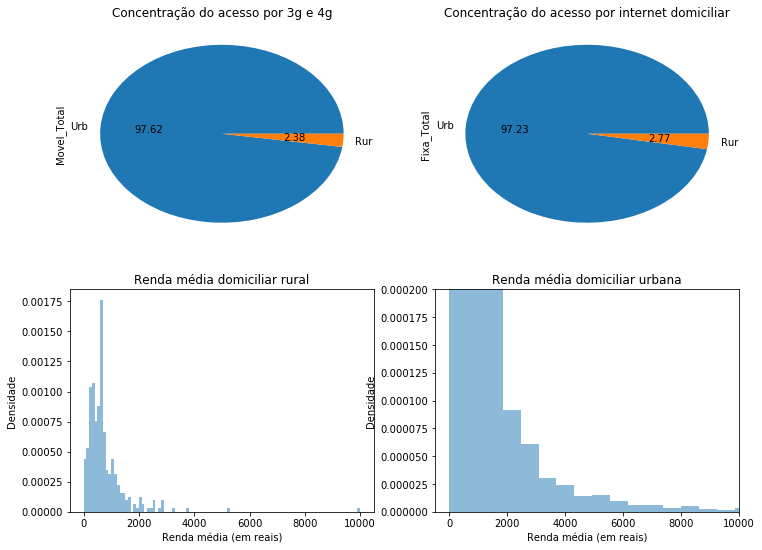

In [30]:
fig, axes= plt.subplots(2, 2)

#plotagem dos gráficos de % do acesso total entre campo e cidade, junto com os histogramas da renda no campo e cidade
Nova_Movel13.plot(kind='pie',ax=axes[0,0], figsize=(12,9), autopct="%0.2f");axes[0,0].set_title("Concentração do acesso por 3g e 4g")
Nova_Fixa13.plot(kind='pie',ax=axes[0,1], figsize=(12,9), autopct="%0.2f");axes[0,1].set_title("Concentração do acesso por internet domiciliar")
plot = renda_Rur13.V4621.plot.hist(bins=100,ax=axes[1,0], title='Renda média domiciliar rural', normed=1, figsize=(12, 9), alpha=0.5);axes[1,0].set_ylabel('Densidade'),axes[1,0].set_xlabel('Renda média (em reais)')
plot = renda_Urb13.V4621.plot.hist(bins=100,ax=axes[1,1], title='Renda média domiciliar urbana', normed=1, figsize=(12, 9), alpha=0.5);axes[1,1].set_ylabel('Densidade'),axes[1,1].set_xlabel('Renda média (em reais)'),plt.axis([-500,10000,0,0.0002])

In [22]:
dados14 = pd.read_csv('DOM2014.csv')

#transformar as variaveis em "categorias" torna mais facil o seu manuseio quando a mesma é composta por poucos valores repetidos
dados14.V4105 = dados14.V4105.astype('category')
dados14.V02322 = dados14.V02322.astype('category')
dados14.V02424 = dados14.V02424.astype('category')

#localizar as linhas da tabela correspondentes às unidades federais do sudeste
dados14 = dados14.loc[(dados14.UF == 31)|\
                      (dados14.UF == 32)|\
                      (dados14.UF == 33)|\
                      (dados14.UF == 35)]


#selecionar as variaveis que serão utilizadas na análise e adicioná-las a um novo dataframe resumido
dados_resumidos14 = dados14.loc[:,["UF","V4105","V02322","V02424","V4621"]]

#essas variáveis contém alguns valores inválidos que prejudicam a análise, esse comando remove esses valores
dados_resumidos14 = dados_resumidos14[pd.notnull(dados_resumidos14.V02322)&\
                                      pd.notnull(dados_resumidos14.V4621)]
#                                     pd.notnull(dados_resumidos14.V02424)] 
#como o comando (notnull) do pandas remove a linha inteira que contém a variavel inválida, ele pode remover linhas demais e
#prejudicar a análise, por isso optei por manter os valores inválidos da variavel V02424, o que não prejudica os graficos


#alguns dos valores da V4621(renda média domiciliar) não foram declarados, na tabela isso é representado como 999999999999
dados_resumidos14 = dados_resumidos14[dados_resumidos14["V4621"]!=999999999999.0]

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso no prório domicilio mais facilmente
dados_resumidos14.loc[((dados_resumidos14.V4105==1)|\
                      (dados_resumidos14.V4105==2)|\
                      (dados_resumidos14.V4105==3))&\
                      (dados_resumidos14.V02322==2),"Movel_Total"]="Urb"

dados_resumidos14.loc[((dados_resumidos14.V4105==4)|\
                      (dados_resumidos14.V4105==5)|\
                      (dados_resumidos14.V4105==6)|\
                      (dados_resumidos14.V4105==7)|\
                      (dados_resumidos14.V4105==8))&\
                      (dados_resumidos14.V02322==2),"Movel_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Movel14 = dados_resumidos14.Movel_Total.value_counts()

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso por 3g e 4g mais facilmente
dados_resumidos14.loc[((dados_resumidos14.V4105==1)|\
                      (dados_resumidos14.V4105==2)|\
                      (dados_resumidos14.V4105==3))&\
                      (dados_resumidos14.V02424==2),"Fixa_Total"]="Urb"

dados_resumidos14.loc[((dados_resumidos14.V4105==4)|\
                      (dados_resumidos14.V4105==5)|\
                      (dados_resumidos14.V4105==6)|\
                      (dados_resumidos14.V4105==7)|\
                      (dados_resumidos14.V4105==8))&\
                      (dados_resumidos14.V02424==2),"Fixa_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Fixa14 = dados_resumidos14.Fixa_Total.value_counts()


#como essas variaveis foram transformadas em categorias anteriormente, pode-se mudar seus valores(2 e 4) para sim e não
dados_resumidos14.V02424.cat.categories = ("Sim", "Não")
dados_resumidos14.V02322.cat.categories = ("Sim", "Não")

#os próximos comandos localizam as variáveis filtradas e as adicionam a um novo dataframe para ser plotado em um gráfico de %
internet_fixa114 = dados_resumidos14.loc[(dados_resumidos14.V4105==1)|\
                                       (dados_resumidos14.V4105==2)|\
                                       (dados_resumidos14.V4105==3)].V02322.value_counts()

internet_fixa214 = dados_resumidos14.loc[(dados_resumidos14.V4105==4)|\
                                       (dados_resumidos14.V4105==5)|\
                                       (dados_resumidos14.V4105==6)|\
                                       (dados_resumidos14.V4105==7)|\
                                       (dados_resumidos14.V4105==8)].V02322.value_counts()

internet_movel114 = dados_resumidos14.loc[(dados_resumidos14.V4105==1)|\
                                        (dados_resumidos14.V4105==2)|\
                                        (dados_resumidos14.V4105==3)].V02424.value_counts()

internet_movel214 = dados_resumidos14.loc[(dados_resumidos14.V4105==4)|\
                                        (dados_resumidos14.V4105==5)|\
                                        (dados_resumidos14.V4105==6)|\
                                        (dados_resumidos14.V4105==7)|\
                                        (dados_resumidos14.V4105==8)].V02424.value_counts()

#aqui a renda é separada em campo e cidade
renda_Urb14 = dados_resumidos14.loc[(dados_resumidos14.V4105==1)|\
                                  (dados_resumidos14.V4105==2)|\
                                  (dados_resumidos14.V4105==3)]

renda_Rur14 = dados_resumidos14.loc[(dados_resumidos14.V4105==4)|\
                                  (dados_resumidos14.V4105==5)|\
                                  (dados_resumidos14.V4105==6)|\
                                  (dados_resumidos14.V4621==7)|\
                                  (dados_resumidos14.V4621==8)]

#aqui as colunas são renomeadas para uma interpretação mais facil dos dados resumidos
dados_resumidos14 = dados_resumidos14.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02424":"Acesso através de 3g ou 4g",\
                                                      "V4621":"Renda domiciliar mensal per capita"})

dados_final14 = dados_resumidos14

dados_final14.to_csv("resumo2014.csv")

## Gráficos das porcentagens dos tipos de acesso (no campo e na cidade) em 2014

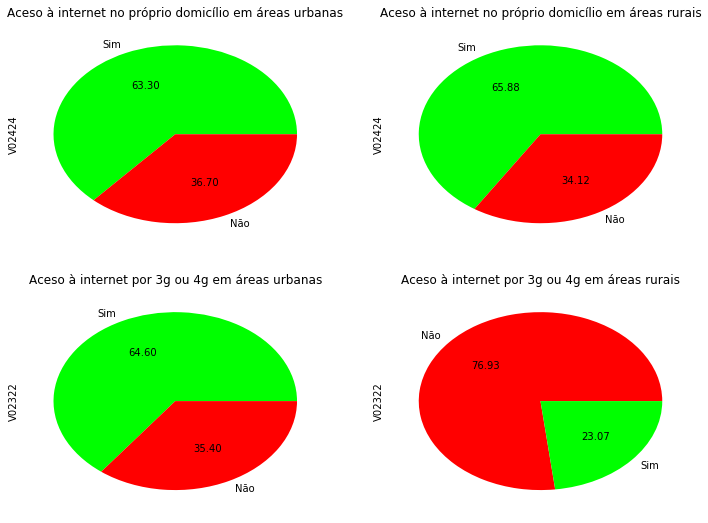

In [23]:
fig,axes = plt.subplots(2,2)

#plotagem dos gráficos de % dos diferentes acessos a internet no campo e na cidade
internet_movel114.plot(kind='pie',ax=axes[0,0],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[0,0].set_title("Aceso à internet no próprio domicílio em áreas urbanas")
internet_movel214.plot(kind='pie',ax=axes[0,1],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[0,1].set_title("Aceso à internet no próprio domicílio em áreas rurais")
internet_fixa114.plot(kind='pie',ax=axes[1,0],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[1,0].set_title("Aceso à internet por 3g ou 4g em áreas urbanas")
internet_fixa214.plot(kind='pie',ax=axes[1,1],figsize=(12,9), colors=('red','lime'), autopct="%0.2f");axes[1,1].set_title("Aceso à internet por 3g ou 4g em áreas rurais")

## Gráficos relacionando renda com concentração do acesso (no campo e na cidade) em 2014

(<matplotlib.text.Text at 0x2a00ce8b0b8>,
 [-500, 10000, 0, 0.0002])

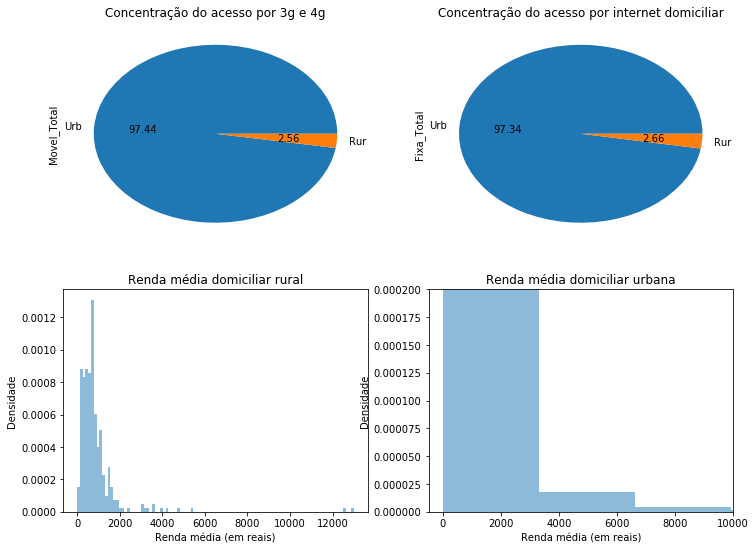

In [31]:
fig, axes= plt.subplots(2, 2)

#plotagem dos gráficos de % do acesso total entre campo e cidade, junto com os histogramas da renda no campo e cidade
Nova_Movel14.plot(kind='pie',ax=axes[0,0], figsize=(12,9), autopct="%0.2f");axes[0,0].set_title("Concentração do acesso por 3g e 4g")
Nova_Fixa14.plot(kind='pie',ax=axes[0,1], figsize=(12,9), autopct="%0.2f");axes[0,1].set_title("Concentração do acesso por internet domiciliar")
plot = renda_Rur14.V4621.plot.hist(bins=100,ax=axes[1,0], title='Renda média domiciliar rural', normed=1, figsize=(12, 9), alpha=0.5);axes[1,0].set_ylabel('Densidade'),axes[1,0].set_xlabel('Renda média (em reais)')
plot = renda_Urb14.V4621.plot.hist(bins=100,ax=axes[1,1], title='Renda média domiciliar urbana', normed=1, figsize=(12, 9), alpha=0.5);axes[1,1].set_ylabel('Densidade'),axes[1,1].set_xlabel('Renda média (em reais)'),plt.axis([-500,10000,0,0.0002])

In [3]:
dados15 = pd.read_csv('DOM2015.csv')

#transformar as variaveis em "categorias" torna mais facil o seu manuseio quando a mesma é composta por poucos valores repetidos
dados15.V4105 = dados15.V4105.astype('category')
dados15.V02322 = dados15.V02322.astype('category')
dados15.V02424 = dados15.V02424.astype('category')

#localizar as linhas da tabela correspondentes às unidades federais do sudeste
dados15 = dados15.loc[(dados15.UF == 31)|\
                      (dados15.UF == 32)|\
                      (dados15.UF == 33)|\
                      (dados15.UF == 35)]


#selecionar as variaveis que serão utilizadas na análise e adicioná-las a um novo dataframe resumido
dados_resumidos15 = dados15.loc[:,["UF","V4105","V02322","V02424","V4621"]]

#essas variáveis contém alguns valores inválidos que prejudicam a análise, esse comando remove esses valores
dados_resumidos15 = dados_resumidos15[pd.notnull(dados_resumidos15.V02322)&\
                                      pd.notnull(dados_resumidos15.V4621)]
#                                     pd.notnull(dados_resumidos15.V02424)] 
#como o comando (notnull) do pandas remove a linha inteira que contém a variavel inválida, ele pode remover linhas demais e
#prejudicar a análise, por isso optei por manter os valores inválidos da variavel V02424, o que não prejudica os graficos


#alguns dos valores da V4621(renda média domiciliar) não foram declarados, na tabela isso é representado como 999999999999
dados_resumidos15 = dados_resumidos15[dados_resumidos15["V4621"]!=999999999999.0]

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso no prório domicilio mais facilmente
dados_resumidos15.loc[((dados_resumidos15.V4105==1)|\
                      (dados_resumidos15.V4105==2)|\
                      (dados_resumidos15.V4105==3))&\
                      (dados_resumidos15.V02322==2),"Movel_Total"]="Urb"

dados_resumidos15.loc[((dados_resumidos15.V4105==4)|\
                      (dados_resumidos15.V4105==5)|\
                      (dados_resumidos15.V4105==6)|\
                      (dados_resumidos15.V4105==7)|\
                      (dados_resumidos15.V4105==8))&\
                      (dados_resumidos15.V02322==2),"Movel_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Movel15 = dados_resumidos15.Movel_Total.value_counts()

#aqui são combinanas duas colunas em uma para plotar o gráfico da distribuição do acesso por 3g e 4g mais facilmente
dados_resumidos15.loc[((dados_resumidos15.V4105==1)|\
                      (dados_resumidos15.V4105==2)|\
                      (dados_resumidos15.V4105==3))&\
                      (dados_resumidos15.V02424==2),"Fixa_Total"]="Urb"

dados_resumidos15.loc[((dados_resumidos15.V4105==4)|\
                      (dados_resumidos15.V4105==5)|\
                      (dados_resumidos15.V4105==6)|\
                      (dados_resumidos15.V4105==7)|\
                      (dados_resumidos15.V4105==8))&\
                      (dados_resumidos15.V02424==2),"Fixa_Total"]="Rur"
#contar a quantidade dessa nova coluna permite a plotagem das porcentagens de cada valor
Nova_Fixa15 = dados_resumidos15.Fixa_Total.value_counts()


#como essas variaveis foram transformadas em categorias anteriormente, pode-se mudar seus valores(2 e 4) para sim e não
dados_resumidos15.V02424.cat.categories = ("Sim", "Não")
dados_resumidos15.V02322.cat.categories = ("Sim", "Não")

#os próximos comandos localizam as variáveis filtradas e as adicionam a um novo dataframe para ser plotado em um gráfico de %
internet_fixa115 = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                       (dados_resumidos15.V4105==2)|\
                                       (dados_resumidos15.V4105==3)].V02322.value_counts()

internet_fixa215 = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                       (dados_resumidos15.V4105==5)|\
                                       (dados_resumidos15.V4105==6)|\
                                       (dados_resumidos15.V4105==7)|\
                                       (dados_resumidos15.V4105==8)].V02322.value_counts()

internet_movel115 = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                        (dados_resumidos15.V4105==2)|\
                                        (dados_resumidos15.V4105==3)].V02424.value_counts()

internet_movel215 = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                        (dados_resumidos15.V4105==5)|\
                                        (dados_resumidos15.V4105==6)|\
                                        (dados_resumidos15.V4105==7)|\
                                        (dados_resumidos15.V4105==8)].V02424.value_counts()

#aqui a renda é separada em campo e cidade
renda_Urb15 = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                  (dados_resumidos15.V4105==2)|\
                                  (dados_resumidos15.V4105==3)]

renda_Rur15 = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                  (dados_resumidos15.V4105==5)|\
                                  (dados_resumidos15.V4105==6)|\
                                  (dados_resumidos15.V4621==7)|\
                                  (dados_resumidos15.V4621==8)]

#aqui as colunas são renomeadas para uma interpretação mais facil dos dados resumidos
dados_resumidos15 = dados_resumidos15.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02424":"Acesso através de 3g ou 4g",\
                                                      "V4621":"Renda domiciliar mensal per capita"})

dados_final15 = dados_resumidos15

dados_final15.to_csv("resumo2015.csv")

## Gráficos das porcentagens dos tipos de acesso (no campo e na cidade) em 2015

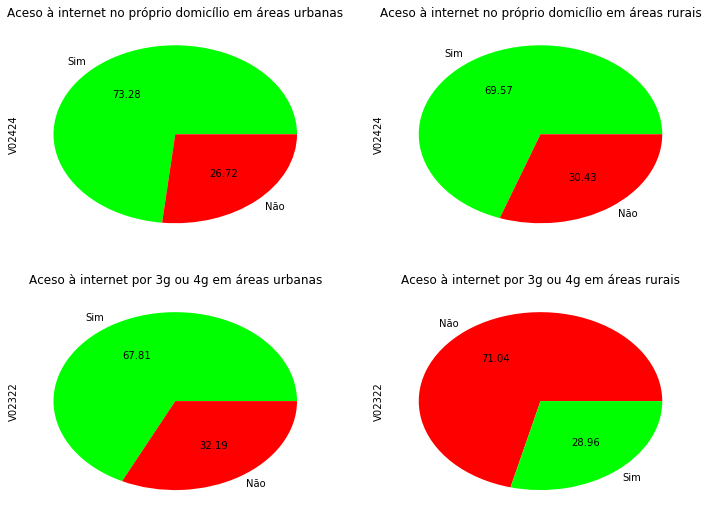

In [5]:
fig,axes = plt.subplots(2,2)

#plotagem dos gráficos de % dos diferentes acessos a internet no campo e na cidade
internet_movel115.plot(kind='pie',ax=axes[0,0],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[0,0].set_title("Aceso à internet no próprio domicílio em áreas urbanas")
internet_movel215.plot(kind='pie',ax=axes[0,1],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[0,1].set_title("Aceso à internet no próprio domicílio em áreas rurais")
internet_fixa115.plot(kind='pie',ax=axes[1,0],figsize=(12,9), colors=('lime','red'), autopct="%0.2f");axes[1,0].set_title("Aceso à internet por 3g ou 4g em áreas urbanas")
internet_fixa215.plot(kind='pie',ax=axes[1,1],figsize=(12,9), colors=('red','lime'), autopct="%0.2f");axes[1,1].set_title("Aceso à internet por 3g ou 4g em áreas rurais")

## Gráficos relacionando renda com concentração do acesso (no campo e na cidade) em 2015

(<matplotlib.text.Text at 0x2a00d5f5c50>,
 [-500, 10000, 0, 0.0002])

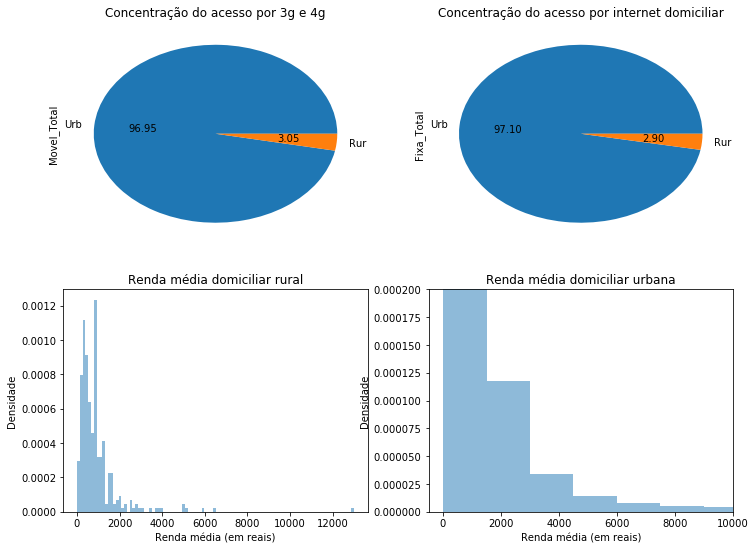

In [32]:
fig, axes= plt.subplots(2, 2)

#plotagem dos gráficos de % do acesso total entre campo e cidade, junto com os histogramas da renda no campo e cidade
Nova_Movel15.plot(kind='pie',ax=axes[0,0], figsize=(12,9), autopct="%0.2f");axes[0,0].set_title("Concentração do acesso por 3g e 4g")
Nova_Fixa15.plot(kind='pie',ax=axes[0,1], figsize=(12,9), autopct="%0.2f");axes[0,1].set_title("Concentração do acesso por internet domiciliar")
plot = renda_Rur15.V4621.plot.hist(bins=100,ax=axes[1,0], title='Renda média domiciliar rural', normed=1, figsize=(12, 9), alpha=0.5);axes[1,0].set_ylabel('Densidade'),axes[1,0].set_xlabel('Renda média (em reais)')
plot = renda_Urb15.V4621.plot.hist(bins=100,ax=axes[1,1], title='Renda média domiciliar urbana', normed=1, figsize=(12, 9), alpha=0.5);axes[1,1].set_ylabel('Densidade'),axes[1,1].set_xlabel('Renda média (em reais)'),plt.axis([-500,10000,0,0.0002])

## Conclusões:

#### O acesso a internet por 3g e 4g, com relação ao campo cresceu consideravelmente entre 2013 e 2015 com um aumento percentual total de aproximadamente 10%.
#### Já o acesso por internet domiciliar teve um crescimento de aproximadamente 20% entre 2013 e 2015
#### Ao analisar paralelamente o número de residências com acesso a internet e sua renda correspondente, percebe-se que a relação é diretamente proporcional, sendo que quanto maior a renda da região, mais acesso a internet.
#### Devido ao aumento da popularidade dos telefones celulares, com relação ao acesso a internet, os mesmos ja podem ser considerados como indicadores de bem estar e felicidade. O crescimento do número de pessoas com acesso a essa tecnologia no campo indica, portanto, um aumento considerável no bem estar dessas regiões